In [1]:
# Common imports
import os
import glob
import numpy as np
import pandas as pd
import xarray as xr
from utils_data import * 
from utils_ml import *
from utils_supervised_methods import *
import matplotlib.pyplot as plt

In [2]:
# Paths
os.getcwd() 
DATADIR = '/Users/noeliaotero/Documents/CAS_ML/data/'
IMAGES_PATH = os.getcwd() + '/../Images'
# Some constants
DATE_START = '1979-01-01'
DATE_END = '2020-12-31'

In [3]:
l_reg = ['R0','R1','R2','R3','R4']
dir_reg  = DATADIR + 'TS_CH/regions/'

In [4]:
def read_regfile(dir_reg, l_reg):
    out = []
    for i in range(len(l_reg)):
        DIRCSV  = dir_reg + l_reg[i] +'/'
        l_files = glob.glob(os.path.join(DIRCSV, 'df*.csv'))
        df_vars =  read_csv_files(l_files, DATE_START, DATE_END)
        out.append(df_vars)
    return(out)
    

In [5]:
dat_reg = read_regfile(dir_reg, l_reg)

In [6]:
# read precipitaion
df_prec = get_precipitation_data ( DATADIR + 'TS_CH/precip_regions.csv', DATE_START, DATE_END)
# Select the right columns: date and aggregated 5 regions
searchfor = ['date', 'aggreg']
ii =df_prec.columns.to_series().str.contains('|'.join(searchfor))
df_reg = df_prec[ii.index[ii]]

In [7]:
# Read Large scale-atmospheric PCs and Clusters
df_PCs = pd.read_csv(DATADIR + 'ERA5/PCdf.csv')
df_PCs['date'] = pd.DatetimeIndex(df_PCs['date']).normalize()
df_clusters =  pd.read_csv(DATADIR + 'ERA5/Cluster_spatialmean.csv')
df_clus    = df_clusters[['date','Cluster']]
df_clus['date'] = pd.DatetimeIndex(df_clus['date']).normalize()

<ipython-input-7-5c266b049817>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clus['date'] = pd.DatetimeIndex(df_clus['date']).normalize()


In [8]:
def fun_mergevar(df_vars, df_prec):
    # Merge everything
    tot = []
    cnames = df_prec.columns.drop('date')
    for i in range(len(df_vars)):
        df_m = pd.merge(df_vars[i],df_prec[['date',cnames[i]]])
        tot.append(df_m)
    
    return(tot)
    

In [9]:
d_regions =  fun_mergevar(dat_reg, df_reg)


<ipython-input-10-ce44fbfef067>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['date'] = pd.DatetimeIndex(df_reg['date'])


<AxesSubplot:xlabel='date'>

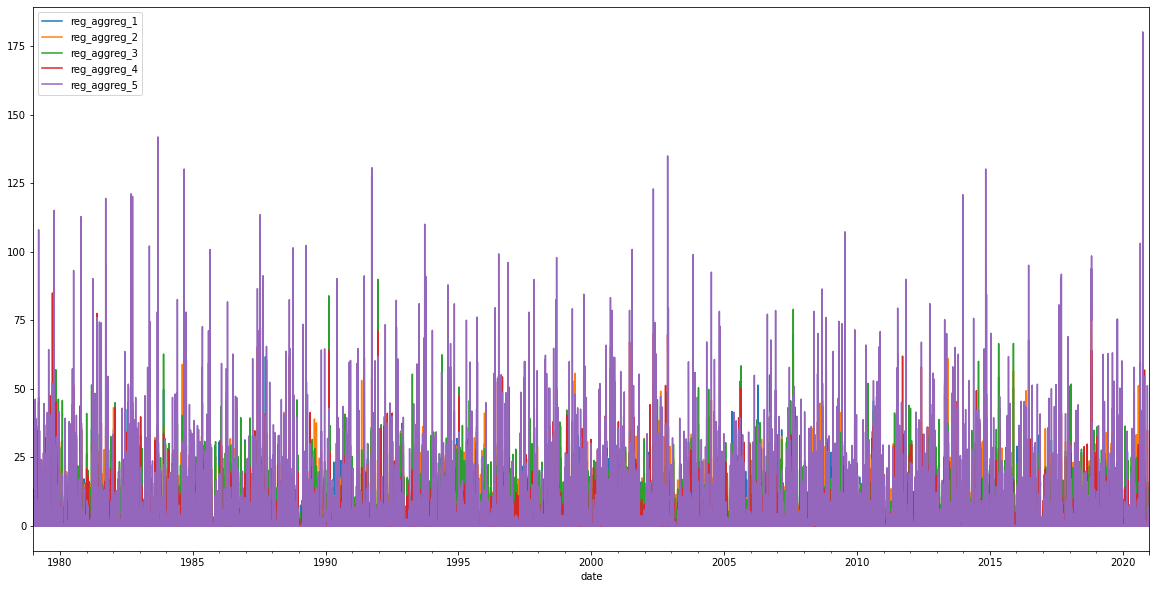

In [10]:
df_reg['date'] = pd.DatetimeIndex(df_reg['date'])
df_reg.set_index('date').plot(figsize=(20,10))


In [11]:
# Start with one region
yy_train = [1979,2015]
yy_test  = [2016,2020]

apply methods for region 
 0
apply MLR for region 
 0
Train MSE = 25.932411602725217
Test MSE = 21.18774596675813
Train RMSE = 5.092387613165873
Test RMSE = 4.6030148779640205
apply RF for region 
 0
Train MSE = 3.5697141277229916
Test MSE = 21.257774596183467
Train RMSE = 1.889368711427971
Test RMSE = 4.610615424884564
Train MSE = 3.9721113404249913
Test MSE = 20.76366419124673
Train RMSE = 1.9930156397843424
Test RMSE = 4.556716382577122
apply methods for region 
 1
apply MLR for region 
 1
Train MSE = 34.60780387658494
Test MSE = 32.894162013367165
Train RMSE = 5.882839779951936
Test RMSE = 5.735343234137532
apply RF for region 
 1
Train MSE = 4.6986078071712
Test MSE = 33.44074503905566
Train RMSE = 2.167627229754046
Test RMSE = 5.782797336847943
Train MSE = 5.070078427286107
Test MSE = 32.885838978268566
Train RMSE = 2.2516834651624786
Test RMSE = 5.734617596515792
apply methods for region 
 2
apply MLR for region 
 2
Train MSE = 40.843354472228604
Test MSE = 36.338857225121615
Tr

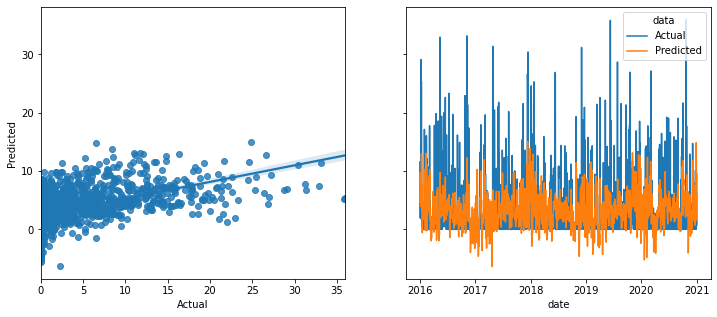

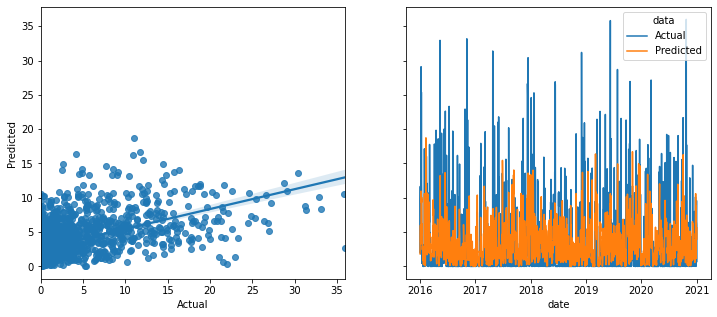

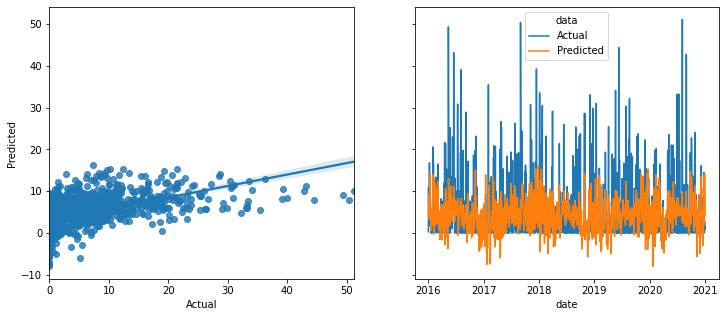

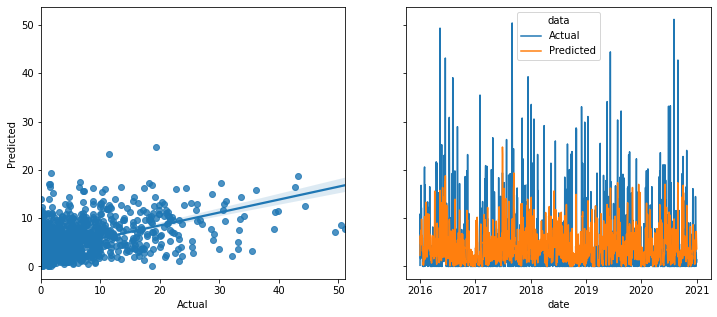

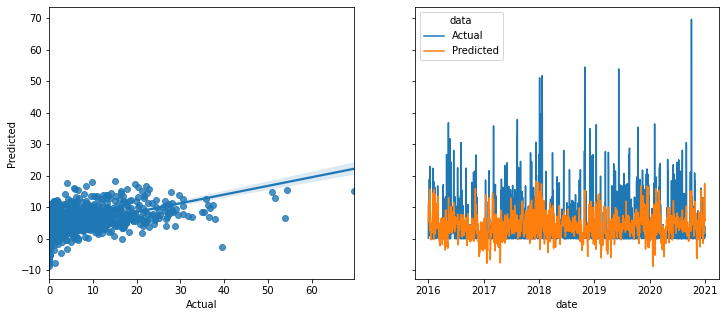

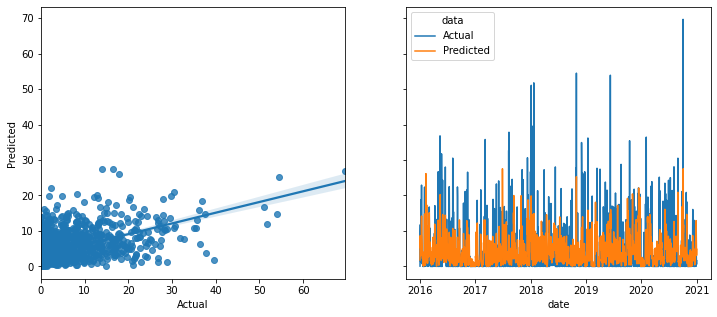

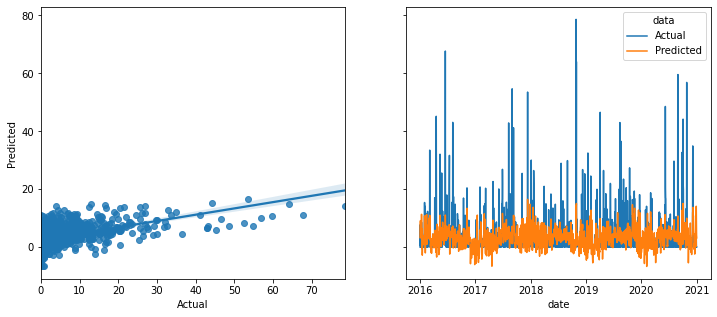

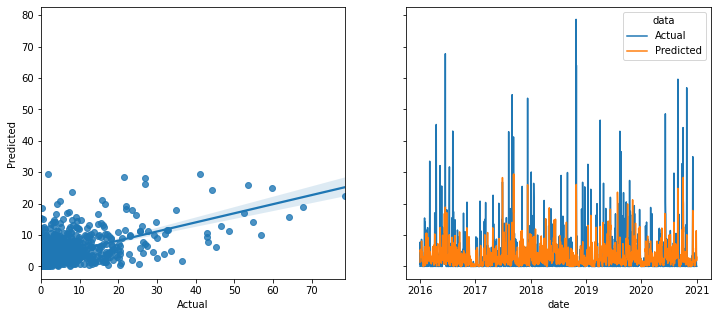

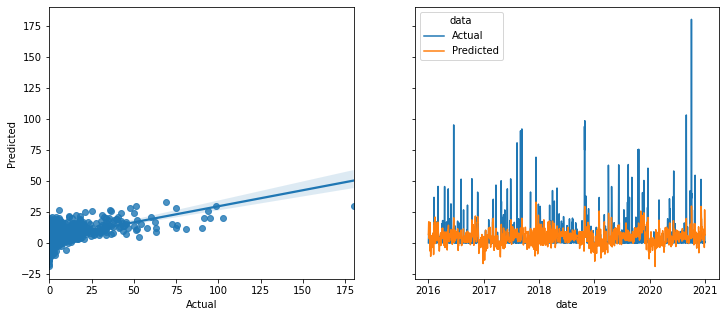

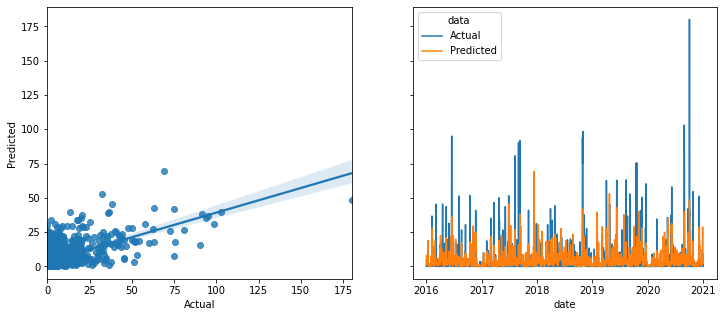

In [17]:
for regions in range(len(d_regions)):
    print('apply methods for region \n',regions)
    X_prep_train, X_prep_test, train_labels, test_labels, train_dates, test_dates = main_reg(d_regions[regions], df_PCs, yy_train, yy_test)
    print('apply MLR for region \n',regions)
    l1, mse_train1, mse_test1, y1_pred = lnmodel(X_prep_train, X_prep_test, train_labels, test_labels)
    plotprediction_TS(test_dates, y1_pred, test_labels)
    print('apply RF for region \n',regions)
    forest_GCV_reg, mse_rf_cv_train, mse_rf_cv_test, y1_rf_pred, features_importance = rfmodel(X_prep_train, X_prep_test, train_labels, test_labels)
    plotprediction_TS(test_dates, y1_rf_pred, test_labels)
    

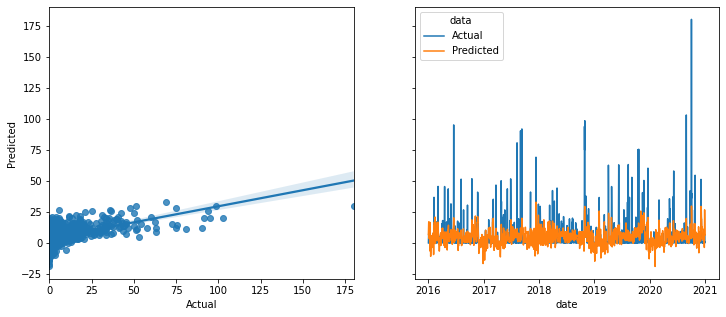